# Prime Numbers and Prime Factors

1. Generate a list of prime numbers up to a given limit.
2. Given a positive integer, return a list of prime factors.

In [2]:
import numpy as np

## Generation of Primes

The Sieve of Eratosthenes works by filtering multiples of numbers out of an ordered list of numbers between 2 and a maximum value. We start by removing any number greater than 2 that is divisible by 2, then move on to the next number, 3, and remove any number greater than 3 that is divisible by 3. Next is 5, then 7, then 11 (since 9 is gone due to being divisible by 3), and so on.

It is important to note that one needn't remove multiples of any number greater than the square root of the maximum value, as all multiples of remaining primes will have been removed already. For example, if the maximum value is 49, one can stop after 7, whereby 49 will have been the only number removed. All multiples of 11 within range (22, 33, 44) will have already been removed when testing for multiples of 2 or 3, as with multiples of 13, 17, 19, etc.

In the case below, I start with all even numbers greater than 2 removed, as it is easy to do with list slicing, and saves significant time at scale.

In [3]:
def gen_primes(limit):
    """Generates a list of prime numbers up to and including the given limit using the
    Sieve of Eratosthenes"""
    
    assert limit > 1, "no primes in this range"
    if limit == 2:
        return [2]
    
    # setup, create list of all odd numbers greater than 1
    numbers = list(range(3, limit+1, 2))
    
    ix = 0
    root_limit = np.sqrt(limit)
    while numbers[ix] <= root_limit:
        numbers = numbers[:ix+1] + [n for n in numbers[ix+1:] if n % numbers[ix] != 0]
        ix += 1
        
    return [2] + numbers

In [4]:
print(gen_primes(100))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


Looks pretty primal.

In the interest of doing a basic timing check, a slightly different approach:

In [6]:
def gen_primes2(limit):
    """Generates a list of prime numbers up to and including the given limit using the
    Sieve of Eratosthenes and a for-loop instead of list comp"""
    
    # setup, create list of all numbers either odd or prime
    numbers = list(range(3, limit+1, 2))
    
    ix = 0
    root_limit = np.sqrt(limit)
    while numbers[ix] <= root_limit:
        for n in numbers[ix+1:]:
            if n % numbers[ix] == 0:
                numbers.remove(n)
        ix += 1
        
    return [2] + numbers

In [7]:
print(gen_primes2(100))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


In [9]:
for n in range(1,6):
    n = 10 ** n
    print("\nn =", n)
    print("Methods agree:", gen_primes(n) == gen_primes2(n))
    print("Method 1:", end=" ")
    %timeit gen_primes(n)
    print("Method 2:", end=" ")
    %timeit gen_primes2(n)


n = 10
Methods agree: True
Method 1: 4.78 µs ± 394 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Method 2: 4.12 µs ± 455 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

n = 100
Methods agree: True
Method 1: 20.7 µs ± 1.92 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Method 2: 26.1 µs ± 2.22 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

n = 1000
Methods agree: True
Method 1: 304 µs ± 11 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Method 2: 1.06 ms ± 23.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

n = 10000
Methods agree: True
Method 1: 4.77 ms ± 184 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Method 2: 85.3 ms ± 1.91 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

n = 100000
Methods agree: True
Method 1: 99.3 ms ± 2.51 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Method 2: 9.28 s ± 833 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Rebuilidng the list with a list comprehension each time through the while loop is noticeably faster than testing and removing numbers one by one once n > 100, and the gap widens significantly as limit increases. The `.remove()` method is O(n), worst-case, on top of another O(n) for-loop, so O(n^2).

But I anticipate that using Numpy would speed things up tremendously...

In [508]:
def gen_primes_np(limit):
    
    # setup with similar shortcut
    nums = np.arange(3, limit+1, 2)
    nums = np.insert(nums, 0, 2)

    ix = 1
    root_limit = np.sqrt(limit)
    while nums[ix] <= root_limit:
        nums = nums[np.logical_or(nums % nums[ix] != 0, nums == nums[ix])]
        ix += 1
    
    return nums

In [525]:
gen_primes_np(100)

array([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59,
       61, 67, 71, 73, 79, 83, 89, 97])

In [526]:
for n in range(1,7):
    n = 10 ** n
    print("\nn =", n)
    print("Methods agree:", np.array_equal(gen_primes_np(100), np.array(gen_primes(100))))
    print("Method 1:", end=" ")
    %timeit gen_primes(n)
    print("Method 2:", end=" ")
    %timeit gen_primes_np(n)


n = 10
Methods agree: True
Method 1: 2.46 µs ± 192 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Method 2: 39.7 µs ± 1.79 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

n = 100
Methods agree: True
Method 1: 15.6 µs ± 368 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Method 2: 51.9 µs ± 5.43 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

n = 1000
Methods agree: True
Method 1: 307 µs ± 20.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Method 2: 172 µs ± 7.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

n = 10000
Methods agree: True
Method 1: 5.34 ms ± 184 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Method 2: 1.04 ms ± 52.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

n = 100000
Methods agree: True
Method 1: 111 ms ± 8.92 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Method 2: 14.1 ms ± 801 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

n = 1000000
Methods agre

And indeed, numpy seriously delivers at scale, though starts off significantly slower, and doesn't catch up until somewhere between 100 and 1000. No contest from there on out though. 

## Find Prime Factors of a Number

In [266]:
def prime_factors_v1(n, primes):
    """Returns a list of prime factors for positive integer n"""
    
    assert n > 0, "n must be a positive integer"
    assert n != 1, "1 is neither prime nor composite"
    
    prime_factors = []
    p_ix = 0
    
    while n not in primes:
        prime = primes[p_ix]
        if n % prime == 0:
            prime_factors.append(prime)
            n //= prime
        else:
            p_ix += 1
    
    prime_factors.append(n)
    
    return prime_factors

In [519]:
primes = gen_primes_np(12)
for n in range(2,12):
    print(f"{n}: {prime_factors_v1(n, primes)}")

2: [2]
3: [3]
4: [2, 2]
5: [5]
6: [2, 3]
7: [7]
8: [2, 2, 2]
9: [3, 3]
10: [2, 5]
11: [11]


In [520]:
primes = gen_primes_np(10010)
for n in range(10000,10010):
    print(f"{n}: {prime_factors_v1(n, primes)}")   

10000: [2, 2, 2, 2, 5, 5, 5, 5]
10001: [73, 137]
10002: [2, 3, 1667]
10003: [7, 1429]
10004: [2, 2, 41, 61]
10005: [3, 5, 23, 29]
10006: [2, 5003]
10007: [10007]
10008: [2, 2, 2, 3, 3, 139]
10009: [10009]


Now, this method works well enough, but checking if `n` is a member of `primes` each time through the while-loop is an O(n) operation, since `primes` is passed as a list or tuple. It would speed things up significantly if `primes` were a set, but we need to reference elements by index in ascending order, so we'd have to have a `primes` set and a `primes` list/tuple. Fine if small, but not ideal if our list of primes takes up a significant chunk of memory. So why check for membership in `primes` at all?

In [273]:
def prime_factors_v2(n, primes):
    """Returns a list of prime factors for positive integer n"""
    
    assert n > 0, "n must be a positive integer"
    assert n != 1, "1 is neither prime nor composite"
    
    prime_factors = []
    p_ix = 0
    
    while n > 1:
        prime = primes[p_ix]
        if n % prime == 0:
            prime_factors.append(prime)
            n //= prime
        else:
            p_ix += 1
       
    return prime_factors

In [521]:
primes = gen_primes_np(110)
for n in range(100,110):
    print(f"{n}: {prime_factors_v2(n, primes)}")

100: [2, 2, 5, 5]
101: [101]
102: [2, 3, 17]
103: [103]
104: [2, 2, 2, 13]
105: [3, 5, 7]
106: [2, 53]
107: [107]
108: [2, 2, 3, 3, 3]
109: [109]


Another idea, which I suspect will be more efficient than the last:

In [275]:
def prime_factors_v3(n, primes):
    """Returns a list of prime factors for positive integer n"""
    
    assert n > 0, "n must be a positive integer"
    assert n != 1, "1 is neither prime nor composite"
    
    prime_factors = []

    for prime in primes:
        while n % prime == 0:
            prime_factors.append(prime)
            n //= prime
        if n == 1:
            break

    return prime_factors

In [522]:
primes = gen_primes_np(1010)
for n in range(1000,1010):
    print(f"{n}: {prime_factors_v3(n, primes)}")

1000: [2, 2, 2, 5, 5, 5]
1001: [7, 11, 13]
1002: [2, 3, 167]
1003: [17, 59]
1004: [2, 2, 251]
1005: [3, 5, 67]
1006: [2, 503]
1007: [19, 53]
1008: [2, 2, 2, 2, 3, 3, 7]
1009: [1009]


Let's see how each does on timing...

In [373]:
for n in range(1000,1010):
    primes = gen_primes_np(n)
    print("\nn =", n)
    print("Prime factors:", prime_factors_v2(n, primes))
    print("Methods agree:", 
          prime_factors_v1(n, primes) == 
          prime_factors_v2(n, primes) == 
          prime_factors_v3(n, primes)
         )
    for i, func in enumerate([
        prime_factors_v1, 
        prime_factors_v2, 
        prime_factors_v3,         
    ]):
        print(f"Method {i+1}:", end=" ")
        %timeit func(n, primes)


n = 1000
Prime factors: [2, 2, 2, 5, 5, 5]
Methods agree: True
Method 1: 18.3 µs ± 927 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Method 2: 2.01 µs ± 182 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
Method 3: 1.75 µs ± 180 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)

n = 1001
Prime factors: [7, 11, 13]
Methods agree: True
Method 1: 15.5 µs ± 395 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Method 2: 1.62 µs ± 29.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
Method 3: 1.37 µs ± 19.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)

n = 1002
Prime factors: [2, 3, 167]
Methods agree: True
Method 1: 8.68 µs ± 224 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Method 2: 6.22 µs ± 316 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Method 3: 4.49 µs ± 157 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

n = 1003
Prime factors: [17, 59]
Methods agree: True
Method

This is interesting. Method 3 is almost always faster than method 2 (all cases except n=1007). Most of the time, 2 and 3 are far faster than method 1. However, method 1 is occasionally faster than the other two (e.g. n=1006, n=1009) by up to an order of magnitude. This happens when n is a prime itself, or a 2x multiple of a prime. In these cases, checking to see if the number or it's half is a prime actually pays off, because one needn't cycle through all or nearly all of the primes to see if each is a prime factor. Otherwise, checking for primality each time around the while-loop unnecessarily adds to the runtime.

Methods 2 and 3 are similar in terms of complexity. 2 loops as long as n is greater than one, and each time, checks to see if n is divisible by the prime at current index. If so, it divides n by the prime, sets n as the quotient, then appends that prime to the list of factors; if not, the index variable is incremented. Method 3 is more effieicnt, as it loops through each prime, and will enter a while-loop if and as long as n is divisible by the current prime, in which, as with method 2, n is divided by the prime and updated with the value of the quotient, and the prime is appended to the list of factors. As soon as n=1, the for-loop breaks. Method 2 is least effient in the cases where method 1 is most efficient, as it has to keep on checking and looping through primes until it hits a large prime that yields a quotient of 1. While method 3 also cycles through all the primes, and checks to see if n is divisible by each or if n=1, it apparently does this more efficiently than method 2.

It's tough to nail down the complexity of 2 or 3, though each seems to be around O(n). Worst case would be if n is prime, as one would have to cycle through the entire list of primes until reaching the equivalent value. Most times, it goes much faster, since this needn't happen, as demonstrated by the cases of 1024 (2^10) and 1021 (prime):

In [523]:
primes = gen_primes_np(1024)
%timeit prime_factors_v3(1024, primes)
%timeit prime_factors_v3(1021, primes)

4.88 µs ± 158 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
72.8 µs ± 2.06 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


However, as it only cycles through all primes <= n, and not n, the complexity is more related to the number of primes than it is n. And with that in mind...

## Fun with Primes

The Prime Number Theorem suggests that π(N) ~ N / ln(N), where π(N) is the prime-counting function, which returns the number of primes less than or equal to N. It follows, then, that the ratio of primes to all numbers could be expressed as π(N) / N ~ 1 / ln(N).

Regarding the complexity of the second two methods above, this would suggest O(N / ln(N)).

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

In [529]:
# all primes up to 1000000
p_mil = gen_primes_np(1000000)

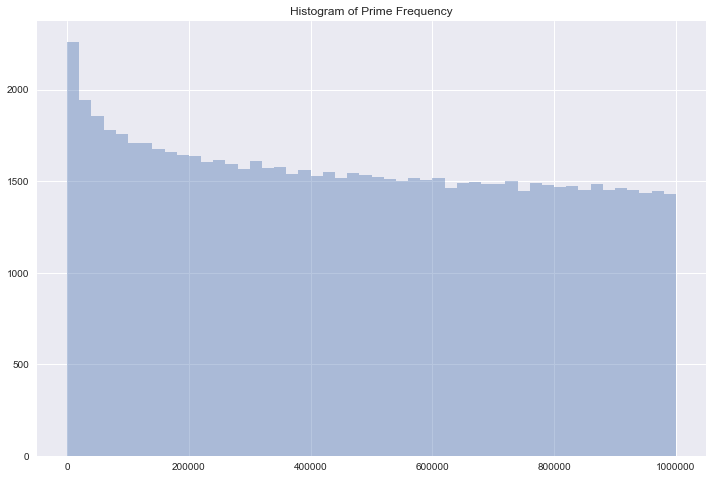

In [548]:
plt.figure(figsize=(12,8))
# plt.hist(x, bins=50)
sns.distplot(p_mil, bins=50, kde=False).set_title("Histogram of Prime Frequency");

In [531]:
# number of primes up to 1M
p_mil.shape

(78498,)

In [550]:
running_prime_count = []
running_prime_ratio = []
for n in range(100,1000001,50):
    pcount = p_mil[p_mil < n].shape[0]
    running_prime_count.append(pcount)
    running_prime_ratio.append(pcount / n)

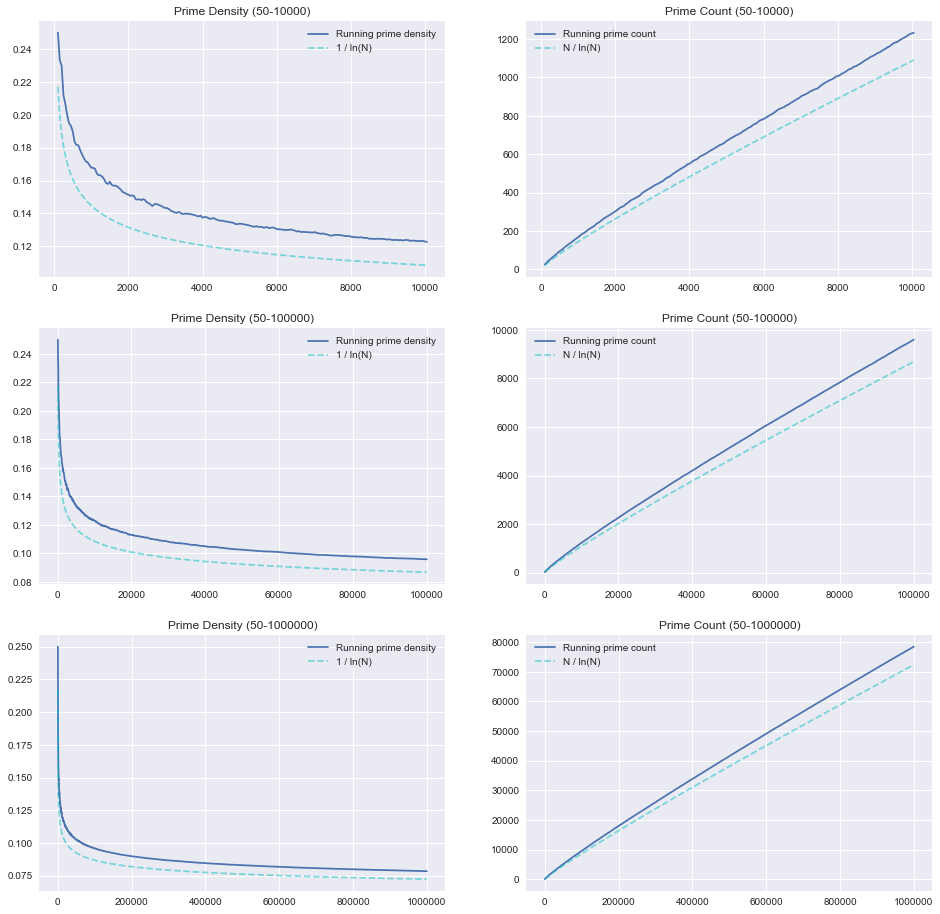

In [561]:
x = np.arange(100,1000001,50)
inv_logx = 1 / np.log(x)
x_inv_logx = x / np.log(x)

fig, ax = plt.subplots(3, 2, figsize=(16,16))

for i, max_n in enumerate([10000, 100000, 1000000]):
    ix = max_n // 50
    # prime density plots
    ax[i][0].plot(x[:ix], running_prime_ratio[:ix], label="Running prime density")
    ax[i][0].plot(x[:ix], inv_logx[:ix], 'c--', alpha=0.5, label="1 / ln(N)")
    ax[i][0].set_title(f"Prime Density (50-{max_n})")
    ax[i][0].legend()
    # prime count plots
    ax[i][1].plot(x[:ix], running_prime_count[:ix], label="Running prime count")
    ax[i][1].plot(x[:ix], x_inv_logx[:ix], 'c--', alpha=0.5, label="N / ln(N)")
    ax[i][1].set_title(f"Prime Count (50-{max_n})")
    ax[i][1].legend();

One can see that the density and count curves smooth out as N increases, in greater and greater approximation of the theoretical curves.

The PNT also suggests that, despite the apparent divergence of π(N) and N / ln(N) as seen above, the limit of π(N) / (N / ln(N)) as N -> ∞ is 1.

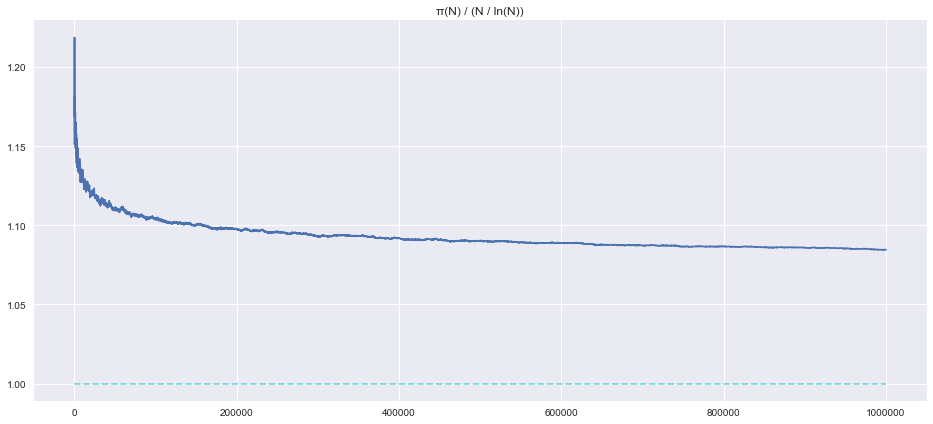

In [579]:
plt.figure(figsize=(16,7))
x_sm = np.linspace(50,1000000)
one = np.ones(x_sm.shape[0])
plt.plot(x, (running_prime_count * np.log(x)) / x)
plt.plot(x_sm, one, "c--", alpha=0.5)
plt.title("π(N) / (N / ln(N))");

Clearly a ways to go before convergence, even at N = 1M, but it does appear to be heading that way.